<a href="https://colab.research.google.com/github/vinayprabhu/Grassmannian_tutorials/blob/master/equiangular_lines_2n_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook walks you through the procedure to generate $2n-2$ equiangular line packing for $n$-dimensional spaces and angle of separation $cos^{-1}(1/3)=70.529^{\circ}$.

For simplicty of visualization of the stages, we choose $n=5$

In [0]:
import numpy as np
from scipy.linalg import block_diag
# Don't do linear algebra in Python without these two lines
np.set_printoptions(suppress=True)
%precision 3

'%.3f'

In [0]:
# Step-1: Generate the Grammian matrix

In [0]:
M=np.array([[1,-1/3],
            [-1/3,1]])
G=block_diag(M,M,M,M)
G[G==0]=1/3
G

array([[ 1.   , -0.333,  0.333,  0.333,  0.333,  0.333,  0.333,  0.333],
       [-0.333,  1.   ,  0.333,  0.333,  0.333,  0.333,  0.333,  0.333],
       [ 0.333,  0.333,  1.   , -0.333,  0.333,  0.333,  0.333,  0.333],
       [ 0.333,  0.333, -0.333,  1.   ,  0.333,  0.333,  0.333,  0.333],
       [ 0.333,  0.333,  0.333,  0.333,  1.   , -0.333,  0.333,  0.333],
       [ 0.333,  0.333,  0.333,  0.333, -0.333,  1.   ,  0.333,  0.333],
       [ 0.333,  0.333,  0.333,  0.333,  0.333,  0.333,  1.   , -0.333],
       [ 0.333,  0.333,  0.333,  0.333,  0.333,  0.333, -0.333,  1.   ]])

Verify that this is a rank deficient matrix whose rank is $2n-2=8$

In [0]:
np.linalg.matrix_rank(G)

5

# Step-2: Perform the Jordan decomposition of the grammian and extract the codebook (F). 
The grammian, by definition is $G=FF^{T}$.
So, the easiest way to obtain the codebook is perform Jordan decomposition ($G=PDP^{-1}$) that yields the codebook to be: $F=PD^{1/2}$

In [0]:
D,P=np.linalg.eigh(G) # Don't use np.linalg.eig ... aaargh. I hate Python!
P,D, P.T-np.linalg.inv(P)

(array([[ 0.088,  0.606,  0.   ,  0.   ,  0.697,  0.   , -0.117,  0.354],
        [ 0.088,  0.606,  0.   ,  0.   , -0.697,  0.   ,  0.117,  0.354],
        [ 0.542, -0.285, -0.   ,  0.   , -0.117,  0.   , -0.697,  0.354],
        [ 0.542, -0.285, -0.   ,  0.   ,  0.117,  0.   ,  0.697,  0.354],
        [-0.315, -0.16 , -0.5  ,  0.707, -0.   ,  0.002, -0.   ,  0.354],
        [-0.315, -0.16 , -0.5  , -0.707, -0.   , -0.002,  0.   ,  0.354],
        [-0.315, -0.16 ,  0.5  ,  0.002, -0.   , -0.707,  0.   ,  0.354],
        [-0.315, -0.16 ,  0.5  , -0.002, -0.   ,  0.707,  0.   ,  0.354]]),
 array([-0.   , -0.   ,  0.   ,  1.333,  1.333,  1.333,  1.333,  2.667]),
 array([[ 0.,  0., -0., -0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -0., -0.,  0.,  0.],
        [-0.,  0.,  0., -0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -0.,  0.,  0.,  0.],
        [ 0.,  0., -0., -0., -0., -0., -0., -0.],
        [-0.,  0.,  0.,  0.,  0.,  0., -0., -0.],
        [ 0., -0.,  0., -0.,  0.

In [0]:
D[np.isclose(D,0)]=0 # For numerical stability 
F=P @ np.sqrt(np.diag(D))
F

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.805,  0.   , -0.135,  0.577],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.805,  0.   ,  0.135,  0.577],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.135,  0.   , -0.805,  0.577],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.135,  0.   ,  0.805,  0.577],
       [ 0.   ,  0.   ,  0.   ,  0.816, -0.   ,  0.003, -0.   ,  0.577],
       [ 0.   ,  0.   ,  0.   , -0.816, -0.   , -0.003,  0.   ,  0.577],
       [ 0.   ,  0.   ,  0.   ,  0.003, -0.   , -0.816,  0.   ,  0.577],
       [ 0.   ,  0.   ,  0.   , -0.003, -0.   ,  0.816,  0.   ,  0.577]])

In [0]:
P_5=np.zeros((8,5))
D_5=np.zeros((5,5))
j=0
for i in range(8):
  if (~ np.isclose(D[i],0)):
    P_5[:,j]=P[:,i]
    D_5[j,j]=D[i]
    j+=1
F_5=P_5 @ np.sqrt(D_5)
P_5,D_5,F_5

(array([[ 0.   ,  0.697,  0.   , -0.117,  0.354],
        [ 0.   , -0.697,  0.   ,  0.117,  0.354],
        [ 0.   , -0.117,  0.   , -0.697,  0.354],
        [ 0.   ,  0.117,  0.   ,  0.697,  0.354],
        [ 0.707, -0.   ,  0.002, -0.   ,  0.354],
        [-0.707, -0.   , -0.002,  0.   ,  0.354],
        [ 0.002, -0.   , -0.707,  0.   ,  0.354],
        [-0.002, -0.   ,  0.707,  0.   ,  0.354]]),
 array([[1.333, 0.   , 0.   , 0.   , 0.   ],
        [0.   , 1.333, 0.   , 0.   , 0.   ],
        [0.   , 0.   , 1.333, 0.   , 0.   ],
        [0.   , 0.   , 0.   , 1.333, 0.   ],
        [0.   , 0.   , 0.   , 0.   , 2.667]]),
 array([[ 0.   ,  0.805,  0.   , -0.135,  0.577],
        [ 0.   , -0.805,  0.   ,  0.135,  0.577],
        [ 0.   , -0.135,  0.   , -0.805,  0.577],
        [ 0.   ,  0.135,  0.   ,  0.805,  0.577],
        [ 0.816, -0.   ,  0.003, -0.   ,  0.577],
        [-0.816, -0.   , -0.003,  0.   ,  0.577],
        [ 0.003, -0.   , -0.816,  0.   ,  0.577],
        [-0.003, -0. 

# Step-3: Verify that the dot products are all of magnitude 1/3 

In [0]:
F_5 @ F_5.T

array([[ 1.   , -0.333,  0.333,  0.333,  0.333,  0.333,  0.333,  0.333],
       [-0.333,  1.   ,  0.333,  0.333,  0.333,  0.333,  0.333,  0.333],
       [ 0.333,  0.333,  1.   , -0.333,  0.333,  0.333,  0.333,  0.333],
       [ 0.333,  0.333, -0.333,  1.   ,  0.333,  0.333,  0.333,  0.333],
       [ 0.333,  0.333,  0.333,  0.333,  1.   , -0.333,  0.333,  0.333],
       [ 0.333,  0.333,  0.333,  0.333, -0.333,  1.   ,  0.333,  0.333],
       [ 0.333,  0.333,  0.333,  0.333,  0.333,  0.333,  1.   , -0.333],
       [ 0.333,  0.333,  0.333,  0.333,  0.333,  0.333, -0.333,  1.   ]])

# Now, save the codebooks

In [0]:
np.save('emb_8_5.npy',F_5)

# Laste step: Sew this numerical recipe up as a function!


In [0]:
def codebook_gen(n):
  print(f'About to generate equi-angular line packings in {n}-D euclidean space.\n  This will yield {2*n-2} equiangular lines with angle 1/3')
  # 1: Generate the Grammian!
  M=np.array([[1,-1/3],
            [-1/3,1]])
  n_rep=int(n-1)
  G = block_diag(*[M]*n_rep)
  G[G==0]=1/3
  # 2: Perform rank-check!
  if(np.linalg.matrix_rank(G)!=n):
    print('Rank of the Grammian not matching!')
    F_code=np.empty(0)
  else:
    # 3: Jordan decomposition and extracting codebooks
    D,P=np.linalg.eigh(G)
    code_columns=np.where(~ np.isclose(D,0))[0]
    P_code=P[:,code_columns]
    F_code=P_code @ np.sqrt(np.diag(D[code_columns]))
    # 4: Pairwise distance comparisons
    dist_mat=F_code @ F_code.T
    pairwise_dist=np.abs(dist_mat[np.triu_indices(2*n-2,k=1)])
    if(np.allclose(pairwise_dist,1/3)):
      file_name=f'embedding_{n}_{2*n-2}.npy'
      print(f'All the lines are 1/3 away!\n   Saving the codebook as {file_name}')
      np.save(file_name, F_code)
    else:
      print('Lines are not 1/3 away :( \n Something went wrong. No codebooks for you!)')
      F_code=np.empty(0)
  return F_code


Now, run it for $n=501$ which yields 1000 lines that can potentially be used for imagenet

In [0]:
# First, let's verify for the n=5 case
x=codebook_gen(5)
print(x@x.T)

About to generate equi-angular line packings in 5-D euclidean space.
  This will yield 8 equiangular lines with angle 1/3
All the lines are 1/3 away!
   Saving the codebook as embedding_5_8.npy
[[ 1.    -0.333  0.333  0.333  0.333  0.333  0.333  0.333]
 [-0.333  1.     0.333  0.333  0.333  0.333  0.333  0.333]
 [ 0.333  0.333  1.    -0.333  0.333  0.333  0.333  0.333]
 [ 0.333  0.333 -0.333  1.     0.333  0.333  0.333  0.333]
 [ 0.333  0.333  0.333  0.333  1.    -0.333  0.333  0.333]
 [ 0.333  0.333  0.333  0.333 -0.333  1.     0.333  0.333]
 [ 0.333  0.333  0.333  0.333  0.333  0.333  1.    -0.333]
 [ 0.333  0.333  0.333  0.333  0.333  0.333 -0.333  1.   ]]


In [0]:
%%time
x=codebook_gen(501)
x@x.T

About to generate equi-angular line packings in 501-D euclidean space.
  This will yield 1000 equiangular lines with angle 1/3
All the lines are 1/3 away!
   Saving the codebook as embedding_501_1000.npy
CPU times: user 1.26 s, sys: 320 ms, total: 1.58 s
Wall time: 850 ms


In [0]:
%%time
x=codebook_gen(512)
x@x.T

About to generate equi-angular line packings in 512-D euclidean space.
  This will yield 1022 equiangular lines with angle 1/3
All the lines are 1/3 away!
   Saving the codebook as embedding_512_1022.npy
CPU times: user 1.34 s, sys: 246 ms, total: 1.59 s
Wall time: 810 ms


In [0]:
# Download the files!
from google.colab import files
files.download('embedding_512_1022.npy')

(1000, 512)
(1022, 512)


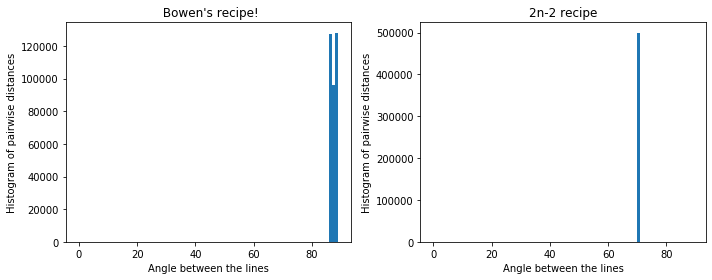

In [0]:
import matplotlib.pyplot as plt
x=np.load('/content/512dim_1000lines.npy')
print(x.shape)
dist_mat=x @ x.T
pairwise_dist=np.abs(dist_mat[np.triu_indices(1000,k=1)])
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(np.rad2deg(np.arccos(pairwise_dist)),np.arange(0,90));
plt.xlabel('Angle between the lines')
plt.ylabel('Histogram of pairwise distances')
plt.title(' Bowen\'s recipe!')
##################################################
x=np.load('/content/embedding_512_1022.npy')
print(x.shape)
dist_mat=x @ x.T
pairwise_dist=np.abs(dist_mat[np.triu_indices(1000,k=1)])
plt.subplot(1,2,2)
plt.hist(np.rad2deg(np.arccos(pairwise_dist)),np.arange(0,90));
plt.xlabel('Angle between the lines')
plt.ylabel('Histogram of pairwise distances')
plt.title('2n-2 recipe')
plt.tight_layout()